<a href="https://colab.research.google.com/github/viswakimi/day/blob/main/datatransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n Pandas, "merge" is used to combine DataFrames based on shared columns (like a database join), "concat" is used to simply stack DataFrames together either vertically or horizontally, and "join" is typically used to combine DataFrames based on their index or a single key column, with "merge" offering more flexibility for complex join operations across multiple columns

In [ ]:
import pandas as pd


In [ ]:
data={
    "date":['2023-01-01','2023-01-01','2023-01-01','2023-01-02','2023-01-02','2023-01-02'],
    "category":['a','c','b','c','b','a'],
    "value":[10,20,15,30,25,35]

}
df=pd.DataFrame(data)

In [ ]:
df

,date,category,value
0,2023-01-01,a,10
1,2023-01-01,c,20
2,2023-01-01,b,15
3,2023-01-02,c,30
4,2023-01-02,b,25
5,2023-01-02,a,35


data reshaping
data subseting and index

In [ ]:
subset=df[df['value']>20]
subset

,date,category,value
3,2023-01-02,c,30
4,2023-01-02,b,25
5,2023-01-02,a,35


pivoting and melting data
Pivoting reshapes data from long format to wide format, typically involving the transformation of rows into columns, creating a pivot table

In [ ]:
pivot_df=df.pivot(index='date',columns='category',values='value')
pivot_df

category,a,b,c
date,,,
2023-01-01,10,15,20
2023-01-02,35,25,30


In [ ]:
pivot_df.index

Index(['2023-01-01', '2023-01-02'], dtype='object', name='date')

In [ ]:
pivot_df.columns

Index(['a', 'b', 'c'], dtype='object', name='category')

 Melt transforms a wide-format DataFrame into a long-format one, making it more suitable for various data analysis tasks, such as visualization and modeling.

In [ ]:
pivot_df.reset_index(inplace=True)
melt_df=pd.melt(pivot_df,id_vars='date',var_name='category',value_name='value')
melt_df


,date,category,value
0,2023-01-01,a,10
1,2023-01-02,a,35
2,2023-01-01,b,15
3,2023-01-02,b,25
4,2023-01-01,c,20
5,2023-01-02,c,30


Stacking involves moving data from columns to rows, and unstacking does the opposite, making data manipulation easier and more structured

In [ ]:
df.set_index(['date','category'])

value
date       category       
2023-01-01 a            10
           c            20
           b            15
2023-01-02 c            30
           b            25
           a            35

In [ ]:
stacked_df=df.set_index(["date",'category']).stack()
stacked_df

date        category       
2023-01-01  a         value    10
            c         value    20
            b         value    15
2023-01-02  c         value    30
            b         value    25
            a         value    35
dtype: int64

In [ ]:
stacked_df['2023-01-01']

,,0
category,,
a,value,10
c,value,20
b,value,15


In [ ]:
stacked_df['2023-01-01'].a.value

10

In [ ]:
unstacked_df=stacked_df.unstack()
unstacked_df

value
date       category       
2023-01-01 a            10
           b            15
           c            20
2023-01-02 a            35
           b            25
           c            30

from matplotlib import pyplot as plt
unstacked_df['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
unstacked_df['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
unstacked_df.reset_index()

,date,category,value
0,2023-01-01,a,10
1,2023-01-01,b,15
2,2023-01-01,c,20
3,2023-01-02,a,35
4,2023-01-02,b,25
5,2023-01-02,c,30


data aggregation

In [ ]:
data={
    "category":['electorn',"cloth",'electorn',"cloth",'electorn'],
    "product":["lap",'shirt','phone','frock','tablet'],
    "sales":[1500,40,800,35,900],
    "profit":[300,5,100,10,200]

}
df1=pd.DataFrame(data)

In [ ]:
df1

,category,product,sales,profit
0,electorn,lap,1500,300
1,cloth,shirt,40,5
2,electorn,phone,800,100
3,cloth,frock,35,10
4,electorn,tablet,900,200


group by method

In [ ]:
grouped_df=df1.groupby('category')
grouped_df

In [ ]:
grouped_df['sales'].max()

,sales
category,
cloth,40
electorn,1500


In [ ]:
df1.groupby("category")["profit"].min()

,profit
category,
cloth,5
electorn,100


In [ ]:
total_sales=grouped_df.sum()
total_sales

,product,sales,profit
category,,,
cloth,shirtfrock,75,15
electorn,lapphonetablet,3200,600


In [ ]:
avg_profit=grouped_df['profit'].mean()
avg_profit

,profit
category,
cloth,7.5
electorn,200.0


for categorical...we will do count only

In [ ]:
product_count=grouped_df['product'].count()
product_count

,product
category,
cloth,2
electorn,3


get_group()

In [ ]:
grouped_df.get_group('electorn')

,category,product,sales,profit
0,electorn,lap,1500,300
2,electorn,phone,800,100
4,electorn,tablet,900,200


In [ ]:
grouped_df.describe()

sales                                                          \
         count         mean         std    min     25%    50%      75%   
category                                                                 
cloth      2.0    37.500000    3.535534   35.0   36.25   37.5    38.75   
electorn   3.0  1066.666667  378.593890  800.0  850.00  900.0  1200.00   

                 profit                                                   \
             max  count   mean         std    min     25%    50%     75%   
category                                                                   
cloth       40.0    2.0    7.5    3.535534    5.0    6.25    7.5    8.75   
electorn  1500.0    3.0  200.0  100.000000  100.0  150.00  200.0  250.00   

                 
            max  
category         
cloth      10.0  
electorn  300.0

data manipulation


sort


In [ ]:
df1

,category,product,sales,profit
0,electorn,lap,1500,300
1,cloth,shirt,40,5
2,electorn,phone,800,100
3,cloth,frock,35,10
4,electorn,tablet,900,200


In [ ]:
df1.sort_values(by='sales')

,category,product,sales,profit
3,cloth,frock,35,10
1,cloth,shirt,40,5
2,electorn,phone,800,100
4,electorn,tablet,900,200
0,electorn,lap,1500,300


In [ ]:
df1.sort_values(by='profit',ascending=False)

,category,product,sales,profit
0,electorn,lap,1500,300
4,electorn,tablet,900,200
2,electorn,phone,800,100
3,cloth,frock,35,10
1,cloth,shirt,40,5


In [ ]:
df1.sort_values(by=['category','profit'],ascending=False)

,category,product,sales,profit
0,electorn,lap,1500,300
4,electorn,tablet,900,200
2,electorn,phone,800,100
3,cloth,frock,35,10
1,cloth,shirt,40,5


Rank


In [ ]:
df1["sales_rank"]=df1["sales"].rank(ascending=False)
df1

,category,product,sales,profit,sales_rank
0,electorn,lap,1500,300,1.0
1,cloth,shirt,40,5,4.0
2,electorn,phone,800,100,3.0
3,cloth,frock,35,10,5.0
4,electorn,tablet,900,200,2.0


In [ ]:
df1["sales_rank"]=df1["sales"].rank(ascending=False)
df1.sort_values(by="sales_rank",inplace=True)
df1

,category,product,sales,profit,sales_rank
0,electorn,lap,1500,300,1.0
4,electorn,tablet,900,200,2.0
2,electorn,phone,800,100,3.0
1,cloth,shirt,40,5,4.0
3,cloth,frock,35,10,5.0


merge

join

In [ ]:
authors_data={
    'author':['author1','author2','author3','author4'],
    'book':['book1','book2','book3','book4'],
    "nationality":['chnina','us','india','uk']
}
df2=pd.DataFrame(authors_data)
df2

,author,book,nationality
0,author1,book1,chnina
1,author2,book2,us
2,author3,book3,india
3,author4,book4,uk


In [ ]:
books_data={
    'book':['book1','book2','book5','book4'],
    'genre':['fiction','non-fiction','fiction','non-fiction'],
    'publication_year':[2000,2005,2010,2015],
    'author':['author1','author2','author5','author4']
}
df3=pd.DataFrame(books_data)

df3

,book,genre,publication_year,author
0,book1,fiction,2000,author1
1,book2,non-fiction,2005,author2
2,book5,fiction,2010,author5
3,book4,non-fiction,2015,author4


In [ ]:
print(df2, '\n\n' ,df3)

    author   book nationality
0  author1  book1      chnina
1  author2  book2          us
2  author3  book3       india
3  author4  book4          uk 

     book        genre  publication_year   author
0  book1      fiction              2000  author1
1  book2  non-fiction              2005  author2
2  book5      fiction              2010  author5
3  book4  non-fiction              2015  author4


by default ...merge= inner join

In [ ]:
df2.merge(df3)

,author,book,nationality,genre,publication_year
0,author1,book1,chnina,fiction,2000
1,author2,book2,us,non-fiction,2005
2,author4,book4,uk,non-fiction,2015


In [ ]:
df2.merge(df3,on="author")

,author,book_x,nationality,book_y,genre,publication_year
0,author1,book1,chnina,book1,fiction,2000
1,author2,book2,us,book2,non-fiction,2005
2,author4,book4,uk,book4,non-fiction,2015


In [ ]:
df2.merge(df3,on="author",how="inner")

,author,book_x,nationality,book_y,genre,publication_year
0,author1,book1,chnina,book1,fiction,2000
1,author2,book2,us,book2,non-fiction,2005
2,author4,book4,uk,book4,non-fiction,2015


In [ ]:
df2.merge(df3,on="author",how="inner",suffixes=("_1","_2"))

,author,book_1,nationality,book_2,genre,publication_year
0,author1,book1,chnina,book1,fiction,2000
1,author2,book2,us,book2,non-fiction,2005
2,author4,book4,uk,book4,non-fiction,2015


In [ ]:
df2.merge(df3,on="author",how="outer",suffixes=("_@","_#"))

,author,book_@,nationality,book_#,genre,publication_year
0,author1,book1,chnina,book1,fiction,2000.0
1,author2,book2,us,book2,non-fiction,2005.0
2,author3,book3,india,NaN,NaN,NaN
3,author4,book4,uk,book4,non-fiction,2015.0
4,author5,NaN,NaN,book5,fiction,2010.0


In [ ]:
df2.merge(df3,on="author",how="left")

,author,book_x,nationality,book_y,genre,publication_year
0,author1,book1,chnina,book1,fiction,2000.0
1,author2,book2,us,book2,non-fiction,2005.0
2,author3,book3,india,NaN,NaN,NaN
3,author4,book4,uk,book4,non-fiction,2015.0


In [ ]:
df2.merge(df3,on="author",how="right")

,author,book_x,nationality,book_y,genre,publication_year
0,author1,book1,chnina,book1,fiction,2000
1,author2,book2,us,book2,non-fiction,2005
2,author5,NaN,NaN,book5,fiction,2010
3,author4,book4,uk,book4,non-fiction,2015


concat-concatenation on matching column

vertically ...

In [ ]:
classA={
    'name':['shiva','emi','ella','jay','arun'],
    'subject':["maths",'english','science','history','geo'],
    'marks':[80,90,70,60,68]
}
classB={
    "name":['david','zara','madhu','kimi','gee'],
    'subject':["maths",'english','arts','cs','geo'],
    'marks':[86,96,76,66,68],
    "grade":['A','b','c','d','e']
}
df4=pd.DataFrame(classA,index=[1,2,3,4,5])
df5=pd.DataFrame(classB,index=[11,12,13,14,15])

df5

,name,subject,marks,grade
11,david,maths,86,A
12,zara,english,96,b
13,madhu,arts,76,c
14,kimi,cs,66,d
15,gee,geo,68,e


In [ ]:
df4

,name,subject,marks
1,shiva,maths,80
2,emi,english,90
3,ella,science,70
4,jay,history,60
5,arun,geo,68


In [ ]:
pd.concat([df4,df5])

,name,subject,marks,grade
1,shiva,maths,80,NaN
2,emi,english,90,NaN
3,ella,science,70,NaN
4,jay,history,60,NaN
5,arun,geo,68,NaN
11,david,maths,86,A
12,zara,english,96,b
13,madhu,arts,76,c
14,kimi,cs,66,d
15,gee,geo,68,e


by default concat perfor ourt join--> union

In [ ]:
pd.concat([df4,df5],join='inner')

,name,subject,marks
1,shiva,maths,80
2,emi,english,90
3,ella,science,70
4,jay,history,60
5,arun,geo,68
11,david,maths,86
12,zara,english,96
13,madhu,arts,76
14,kimi,cs,66
15,gee,geo,68


In [ ]:
df5.drop("grade",axis=1,inplace=True)


In [ ]:
pd.concat([df4,df5],ignore_index=True)

,name,subject,marks
0,shiva,maths,80
1,emi,english,90
2,ella,science,70
3,jay,history,60
4,arun,geo,68
5,david,maths,86
6,zara,english,96
7,madhu,arts,76
8,kimi,cs,66
9,gee,geo,68


In [ ]:
pd.concat([df4,df5],keys=["classA","classB"])

name  subject  marks
classA 1   shiva    maths     80
       2     emi  english     90
       3    ella  science     70
       4     jay  history     60
       5    arun      geo     68
classB 11  david    maths     86
       12   zara  english     96
       13  madhu     arts     76
       14   kimi       cs     66
       15    gee      geo     68

join
based on matching index(by default-->left join)

In [ ]:
names=['sana','buvi','puvi']
df6 = pd.DataFrame({'name':names, 'age':[50,60,70]})
df7=pd.DataFrame({"qualify":[True,False,True,False]})
df6

,name,age
0,sana,50
1,buvi,60
2,puvi,70


In [ ]:
df6.join(df7)

,name,age,qualify
0,sana,50,True
1,buvi,60,False
2,puvi,70,True


In [ ]:
pd.concat([df6,df7],axis=1)

,name,age,qualify
0,sana,50.0,True
1,buvi,60.0,False
2,puvi,70.0,True
3,NaN,NaN,False


In [ ]:
df6.join(df7,how="inner")

,name,age,qualify
0,sana,50,True
1,buvi,60,False
2,puvi,70,True


In [ ]:
df6.join(df7,how="right")

,name,age,qualify
0,sana,50.0,True
1,buvi,60.0,False
2,puvi,70.0,True
3,NaN,NaN,False


In [ ]:
df8=pd.DataFrame({'name':['sana','buvi','puvi'],"qualify":[True,False,True]})

join...error due to matching column names...

ValueError: columns overlap but no suffix specified: Index(['name'], dtype='object')

In [ ]:
df6.join(df8)

ValueError: columns overlap but no suffix specified: Index(['name'], dtype='object')

In [ ]:
df6.join(df8,lsuffix='_1',rsuffix='_2')
# specify suufix to avaoid error

,name_1,age,name_2,qualify
0,sana,50,sana,True
1,buvi,60,buvi,False
2,puvi,70,puvi,True


In [ ]:
df6=df6.set_index('name')
df6

,age
name,
sana,50
buvi,60
puvi,70


### **data wrangling**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = {'Name': ['Jai sri', 'Princi', 'Gaurav',
                 'Anuj', 'Ravi dri', 'Natasha', 'Riya'],
        'Age': [17, 17, 18, 17, 18, 17, 17],
        'Gender': ['M', 'F', ' ', 'M', 'M', 'F', 'F'],
        'Marks': [90, 76, 'NaN', 74, 65, 'NaN', 71]}
 # Convert into DataFrame
df = pd.DataFrame(data)

# Display data
df

,Name,Age,Gender,Marks
0,Jai sri,17,M,90
1,Princi,17,F,76
2,Gaurav,18,,NaN
3,Anuj,17,M,74
4,Ravi dri,18,M,65
5,Natasha,17,F,NaN
6,Riya,17,F,71


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    7 non-null      object
 1   Age     7 non-null      int64 
 2   Gender  7 non-null      object
 3   Marks   7 non-null      object
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


In [ ]:
df['Gender'].str.isspace()

,Gender
0,False
1,False
2,True
3,False
4,False
5,False
6,False


In [ ]:
df['Gender'].str.isspace().sum()

1

In [ ]:
df['Gender'].str.contains(' ')

,Gender
0,False
1,False
2,True
3,False
4,False
5,False
6,False


In [ ]:
df['Gender'].replace(' ',np.nan).to_frame()

,Gender
0,M
1,F
2,NaN
3,M
4,M
5,F
6,F


In [ ]:
df['Gender'].replace(' ',np.nan,regex=True).to_frame()

,Gender
0,M
1,F
2,M
3,M
4,M
5,F
6,F


In [ ]:
df['Gender'].replace(' ',np.nan,regex=True,inplace=True)

In [ ]:
df.isna().sum()

,0
Name,0
Age,0
Gender,1
Marks,0


In [ ]:
df.dropna()

,Name,Age,Gender,Marks
0,Jai,17,M,90
1,Princi,17,F,76
3,Anuj,17,M,74
4,Ravi,18,M,65
5,Natasha,17,F,NaN
6,Riya,17,F,71


In [ ]:
df.dropna(subset=['Marks'],inplace=True)
df

,Name,Age,Gender,Marks
0,Jai,17,M,90
1,Princi,17,F,76
2,Gaurav,18,NaN,NaN
3,Anuj,17,M,74
4,Ravi,18,M,65
5,Natasha,17,F,NaN
6,Riya,17,F,71


In [ ]:
df['Gender'].dtype

dtype('O')

In [ ]:
df['Name'].str.extract("[a-z]",expand=False).unique()


In [ ]:
df['Marks'].str.extract('(\d+)')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN


In [ ]:
df['Age'].astype(int)

,Age
0,17
1,17
2,18
3,17
4,18
5,17
6,17


In [ ]:
df['Gender'] = df['Gender'].map({'M': 0,
                                 'F': 1, }).astype(float)

# Display data
df

,Name,Age,Gender,Marks
0,Jai sri,17,0.0,90
1,Princi,17,1.0,76
2,Gaurav,18,NaN,NaN
3,Anuj,17,0.0,74
4,Ravi dri,18,0.0,65
5,Natasha,17,1.0,NaN
6,Riya,17,1.0,71


In [ ]:


# Remove age column from filtered DataFrame
df.drop('Age', axis=1, inplace=True)

# Display data
df

,Name,Gender,Marks
0,Jai sri,0.0,90
1,Princi,1.0,76
2,Gaurav,NaN,NaN
3,Anuj,0.0,74
4,Ravi dri,0.0,65
5,Natasha,1.0,NaN
6,Riya,1.0,71


In [ ]:
# Filter top scoring students
df = df[df['Marks'] > 75].copy()

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
df['Age'].mean()

17.285714285714285

In [ ]:
# for all digit
df['Marks'].str.extract(r'(\d+)')
# for 1st np.digiti
df['Marks'].str.extract('(\d)')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN


In [ ]:
df['Marks'].str.extract(r'(\d+[.\d]*)')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN


In [ ]:
df['Marks'].str.extract(r'(\d+[.\d]*)',expand=False)

,Marks
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN


In [ ]:
df[].split("")
df[].split("")[0]
df[].str.split("").str.get(0)



In [ ]:
df[].apply(round,ndigits=2)


In [ ]:
df[].replace(r'[^\w]'),np.nan,regex=True,inplace=True)

df[].fillna(df.mean(),inplace=True)




In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {'Marks': ['85', '90', '75', '88', '65']}
df = pd.DataFrame(data)

# Extract all digits
df['AllDigits'] = df['Marks'].str.extractall(r'(\d)').unstack().apply(''.join, axis=1)
print(df)


  Marks AllDigits
0    85        85
1    90        90
2    75        75
3    88        88
4    65        65


In [ ]:
# Extract all digits
df['ExtractedDigits'] = df['Marks'].str.extract(r'(\d+)')
print(df)


  Marks AllDigits ExtractedDigits
0    85        85              85
1    90        90              90
2    75        75              75
3    88        88              88
4    65        65              65


In [ ]:
# Extract first digit
df['FirstDigit'] = df['Marks'].str.extract('(\d)')
print(df)


  Marks AllDigits ExtractedDigits FirstDigit
0    85        85              85          8
1    90        90              90          9
2    75        75              75          7
3    88        88              88          8
4    65        65              65          6


In [ ]:
# Split and get the first digit
df['SplitFirstDigit'] = df['Marks'].str.split("").str.get(1)
print(df)


  Marks AllDigits ExtractedDigits FirstDigit SplitFirstDigit
0    85        85              85          8               8
1    90        90              90          9               9
2    75        75              75          7               7
3    88        88              88          8               8
4    65        65              65          6               6


In [ ]:
# Filter rows where 'Marks' > 75
df_filtered = df[df['Marks'].astype(int) > 75].copy()
print(df_filtered)


  Marks AllDigits ExtractedDigits FirstDigit SplitFirstDigit
0    85        85              85          8               8
1    90        90              90          9               9
3    88        88              88          8               8


In [ ]:
# Sample DataFrame with float values
data = {'Scores': [85.1234, 90.5678, 75.9123, 88.2345, 65.6789]}
df = pd.DataFrame(data)

# Round to 2 decimal places
df['RoundedScores'] = df['Scores'].apply(round, ndigits=2)
print(df)


    Scores  RoundedScores
0  85.1234          85.12
1  90.5678          90.57
2  75.9123          75.91
3  88.2345          88.23
4  65.6789          65.68


In [ ]:
# Sample DataFrame with special characters
data = {'Remarks': ['Good', 'Exce!!ent', 'Avera@ge', 'Grea$t', 'Poor']}
df = pd.DataFrame(data)

# Replace non-alphanumeric characters with NaN
df.replace(r'[^\w]', np.nan, regex=True, inplace=True)
print(df)


  Remarks
0    Good
1     NaN
2     NaN
3     NaN
4    Poor


In [ ]:
# Sample DataFrame with numbers and decimals
data = {'Marks': ['85.5', '90', '75.75', '88.2', '65']}
df = pd.DataFrame(data)

# Extract number with optional decimal
df['ExtractedNumber'] = df['Marks'].str.extract(r'(\d+[.\d]*)', expand=False)
print(df)


   Marks ExtractedNumber
0   85.5            85.5
1     90              90
2  75.75           75.75
3   88.2            88.2
4     65              65


In [ ]:
# Sample DataFrame with NaN values
data = {'Scores': [85.5, np.nan, 75.75, 88.2, np.nan]}
df = pd.DataFrame(data)

# Fill NaN values with column mean
df.fillna(df.mean(), inplace=True)
print(df)


   Scores
0   85.50
1   83.15
2   75.75
3   88.20
4   83.15


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Marks': ['85', '90', '75', '88', '65'],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
}
df = pd.DataFrame(data)

# Extracting digits from 'Marks'
df['ExtractedDigits'] = df['Marks'].str.extract('(\d+)')
print("Extracted Digits from 'Marks':")
print(df)




Extracted Digits from 'Marks':
  Marks     Name ExtractedDigits
0    85    Alice              85
1    90      Bob              90
2    75  Charlie              75
3    88    David              88
4    65      Eve              65


datetime

In [ ]:
data={'datestring':['2023-10-20','2010/12/20','2023,oct 20']}
df=pd.DataFrame(data)
df


,datestring
0,2023-10-20
1,2010/12/20
2,"2023,oct 20"


The error occurs because the pd.to_datetime() function encounters different date formats in the datestring column and is unable to parse them consistently. Here's how you can handle it:

Using format='mixed' to Parse Mixed Formats
You can use the format='mixed' parameter to allow pandas to infer the format for each element individually.

In [ ]:
import pandas as pd

data = {'datestring': ['2023-10-20', '2010/12/20', '2023,oct 20']}
df = pd.DataFrame(data)

# Convert datestring to datetime
df['parseddate'] = pd.to_datetime(df['datestring'], format='mixed', errors='coerce')

print(df)


    datestring parseddate
0   2023-10-20 2023-10-20
1   2010/12/20 2010-12-20
2  2023,oct 20 2023-10-20


In [ ]:
df['parseddate'] = pd.to_datetime(df['datestring'], errors='coerce')
df

,datestring,parseddate
0,2023-10-20,2023-10-20
1,10/20/2023,NaT
2,"oct 20,2023",NaT


In [ ]:
df['year']=df['parseddate'].dt.year
df

,datestring,parseddate,year
0,2023-10-20,2023-10-20,2023
1,2010/12/20,2010-12-20,2010
2,"2023,oct 20",2023-10-20,2023


In [ ]:
df['parseddate'].dt.year
df

,datestring,parseddate,year
0,2023-10-20,2023-10-20,2023
1,2010/12/20,2010-12-20,2010
2,"2023,oct 20",2023-10-20,2023


In [ ]:
df['parseddate'].dt.month

,parseddate
0,10
1,12
2,10


In [ ]:
df['parseddate'].dt.day

,parseddate
0,20
1,20
2,20


label encoding

In [ ]:
data={'color':['red','blue','green','red','blue']}
df=pd.DataFrame(data)
df

,color
0,red
1,blue
2,green
3,red
4,blue


In [ ]:
df['color'].unique()

array(['red', 'blue', 'green'], dtype=object)

In [ ]:
df['color_labelencoded']=df['color'].astype("category").cat.codes
df

,color,color_labelencoded
0,red,2
1,blue,0
2,green,1
3,red,2
4,blue,0


onehot encoding

In [ ]:
dummies=pd.get_dummies(df['color'])
dummies

,blue,green,red
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,True,False,False


In [ ]:
dummies = dummies.astype(int)
dummies

,blue,green,red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'color': ['red', 'blue', 'green', 'red', 'blue']
}

df = pd.DataFrame(data)

# Generate dummy variables
dummies = pd.get_dummies(df['color'])

# Convert boolean to integer
dummies = dummies.astype(int)

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, dummies], axis=1)

print(df)


   color  blue  green  red
0    red     0      0    1
1   blue     1      0    0
2  green     0      1    0
3    red     0      0    1
4   blue     1      0    0


In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)

# Generate a negatively skewed dataset so use(-)

In [ ]:
symmerticdata=np.random.normal(size=1000)
right_skeweddata=np.random.exponential(scale=2,size=1000)
left_skeweddata= -np.random.exponential(scale=2,size=1000)

In [ ]:
import matplotlib.pyplot as plt

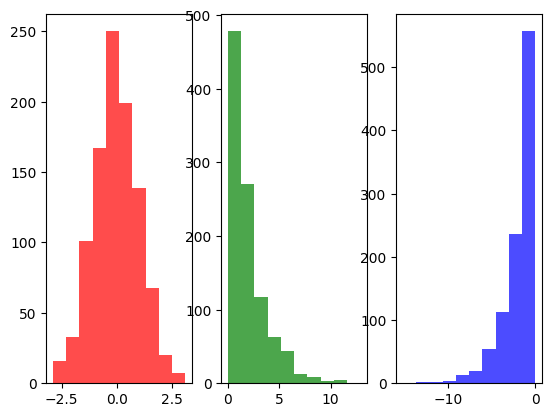

In [ ]:
plt.subplot(1,3,1)
plt.hist(symmerticdata,color="red",alpha=0.7)
plt.subplot(1,3,2)
plt.hist(right_skeweddata,color="green",alpha=0.7)
plt.subplot(1,3,3)
plt.hist(left_skeweddata,color="blue",alpha=0.7)
plt.show()



Skewness of Positive Skew Data: 5.3641683837479475
Skewness of Negative Skew Data: -4.565172585583186


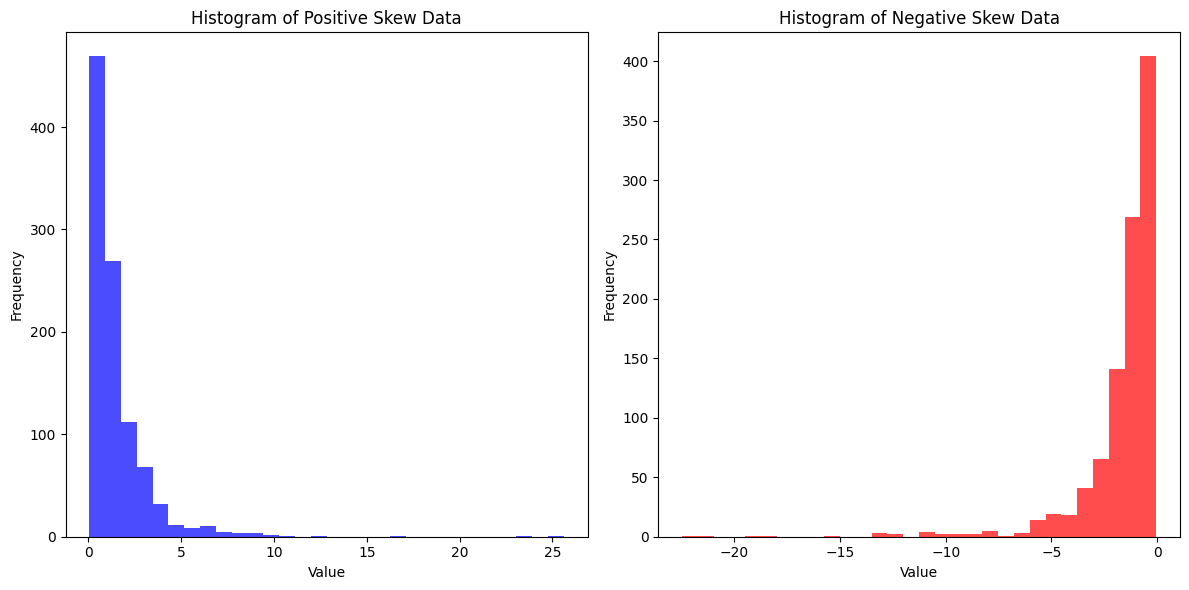

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# Generate a positively skewed dataset
data_positive_skew = np.random.lognormal(mean=0, sigma=1, size=1000)

# Generate a negatively skewed dataset
data_negative_skew = -np.random.lognormal(mean=0, sigma=1, size=1000)

# Combine the datasets into a DataFrame
df = pd.DataFrame({
    'Positive Skew': data_positive_skew,
    'Negative Skew': data_negative_skew
})

# Calculate skewness
positive_skewness = skew(df['Positive Skew'])
negative_skewness = skew(df['Negative Skew'])

print(f"Skewness of Positive Skew Data: {positive_skewness}")
print(f"Skewness of Negative Skew Data: {negative_skewness}")

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(df['Positive Skew'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Histogram of Positive Skew Data')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['Negative Skew'], bins=30, color='red', alpha=0.7)
axs[1].set_title('Histogram of Negative Skew Data')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Skewness of Left Skew Data: -4.912985681080585
Standard Deviation of Left Skew Data: 2.1412984934909005


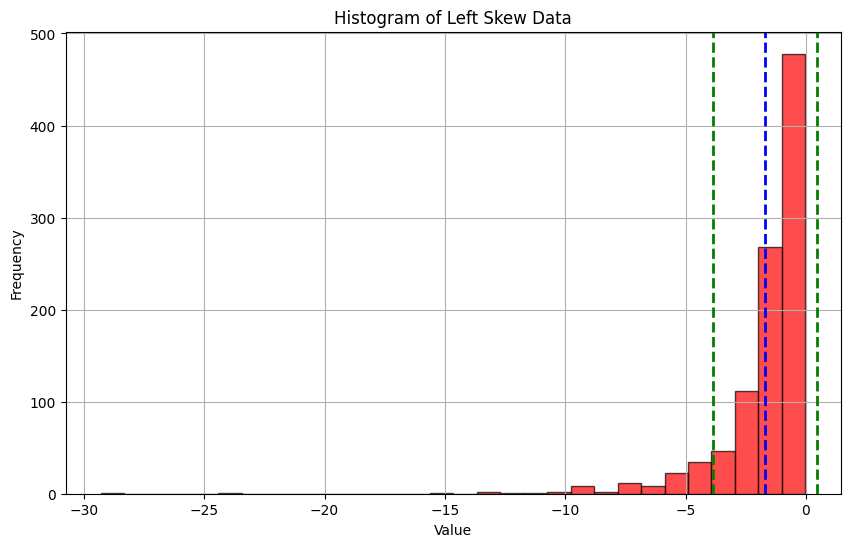

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# Generate left-skewed data
data_left_skew = -np.random.lognormal(mean=0, sigma=1, size=1000)

# Create DataFrame
df = pd.DataFrame({'Left Skew': data_left_skew})

# Calculate skewness
left_skewness = skew(df['Left Skew'])
print(f"Skewness of Left Skew Data: {left_skewness}")

# Calculate standard deviation
left_std_dev = np.std(df['Left Skew'])
print(f"Standard Deviation of Left Skew Data: {left_std_dev}")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Left Skew'], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title('Histogram of Left Skew Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(df['Left Skew'].mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(df['Left Skew'].mean() - left_std_dev, color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['Left Skew'].mean() + left_std_dev, color='green', linestyle='dashed', linewidth=2)
plt.show()


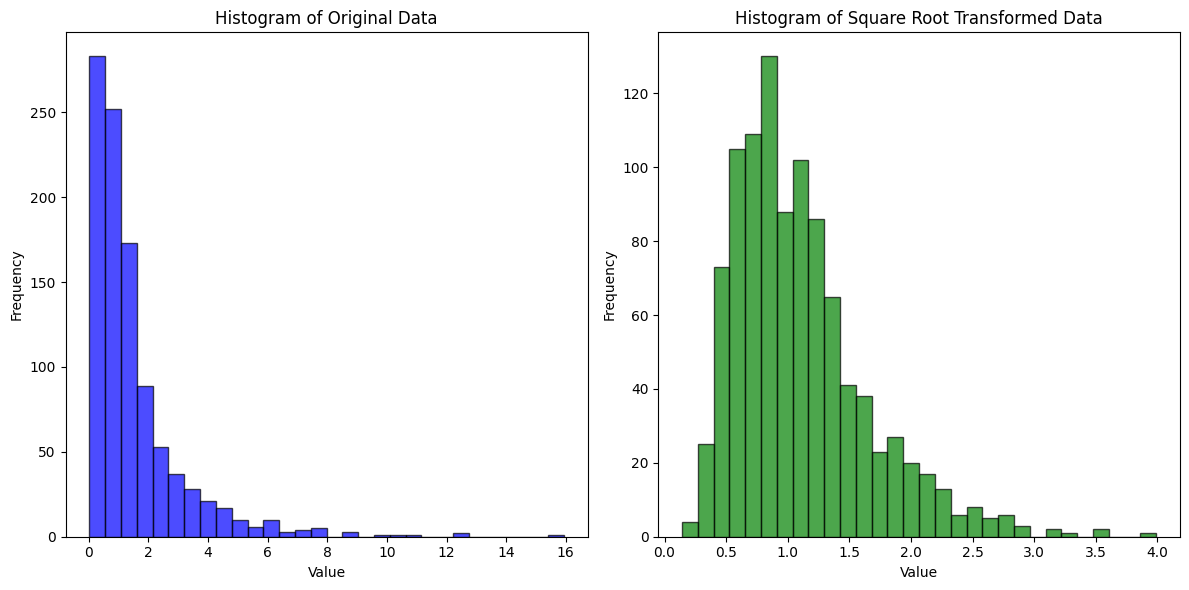

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate positively skewed data
data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Create DataFrame
df = pd.DataFrame({'Original Data': data})

# Apply square root transformation
df['Square Root Transformed Data'] = np.sqrt(df['Original Data'])

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original data histogram
axs[0].hist(df['Original Data'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Histogram of Original Data')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Square root transformed data histogram
axs[1].hist(df['Square Root Transformed Data'], bins=30, color='green', alpha=0.7, edgecolor='black')
axs[1].set_title('Histogram of Square Root Transformed Data')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


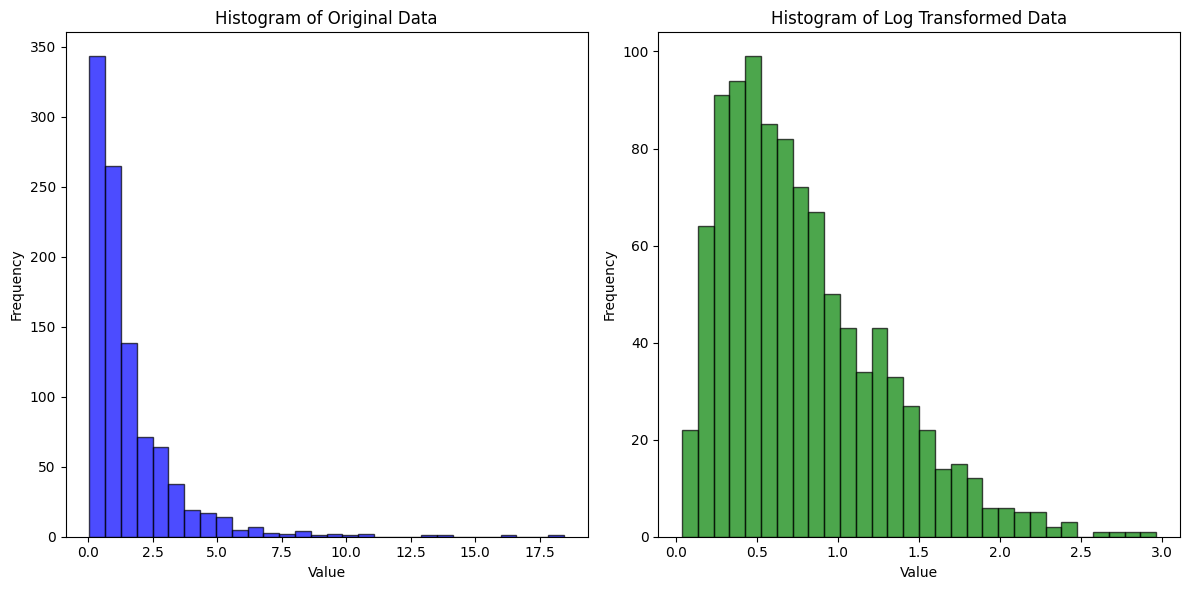

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate positively skewed data
data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Create DataFrame
df = pd.DataFrame({'Original Data': data})

# Apply log transformation (adding 1 to avoid log(0))
df['Log Transformed Data'] = np.log1p(df['Original Data'])

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original data histogram
axs[0].hist(df['Original Data'], bins=30, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Histogram of Original Data')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Log transformed data histogram
axs[1].hist(df['Log Transformed Data'], bins=30, color='green', alpha=0.7, edgecolor='black')
axs[1].set_title('Histogram of Log Transformed Data')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


features selection and scaling

In [1]:
import pandas as pd

In [6]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
import seaborn as sns

<Axes: >

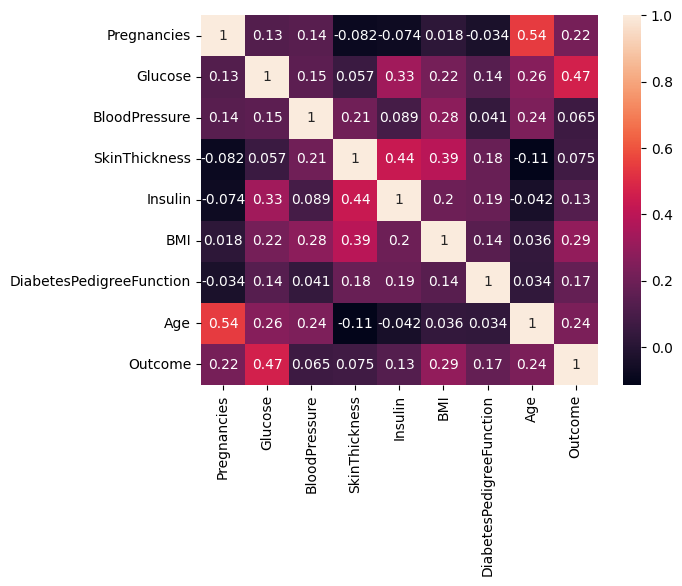

In [12]:
sns.heatmap(df.corr(),annot=True)

features selection

In [15]:
x=df.iloc[:,:-1]
y=df['Outcome']
x.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
y.sample(5)

,Outcome
686,0
610,0
32,0
347,0
318,0


feature scaling data standardization

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
df_scaled=pd.DataFrame(data=x_scaled,columns=x.columns)
df['Outcome']=y

In [20]:
print('original diabetes dataset:')
display(df.head())
print('scaled diabetes dataset:')
df_scaled.head()

original diabetes dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


scaled diabetes dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [22]:
df_normalized=pd.DataFrame(data=x_scaled,columns=x.columns)
df_normalized['Outcome']=y

In [23]:
print("original diabetes datset")
display(df.head())
print("normalized diabetes dataset")
df_normalized.head()

original diabetes datset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


normalized diabetes dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [10]:
# Install kagglehub library
!pip install kagglehub

# Import the kagglehub library
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("ninzaami/loan-predication")
print("Path to dataset files:", path)

# Load the dataset into a Pandas DataFrame
import pandas as pd

# Example: Assuming the dataset is a CSV file, read it into a DataFrame
df = pd.read_csv(f"{path}/filename.csv")

# Display the first few rows of the dataset
df.head()


100%|██████████| 7.83k/7.83k [00:00<00:00, 11.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1/filename.csv'

In [ ]:
import os
# List all files in the dataset directory
files = os.listdir(path)
print(files)


In [11]:
import os
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(f"{path}/train_u6lujuX_CVtuZ9i (1).csv")

# Display the first few rows of the dataset
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


exploratory data analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


categorical variables

In [35]:
df['Loan_ID'].nunique()

614

In [36]:
df.shape

(614, 13)

<Axes: xlabel='Loan_Status'>

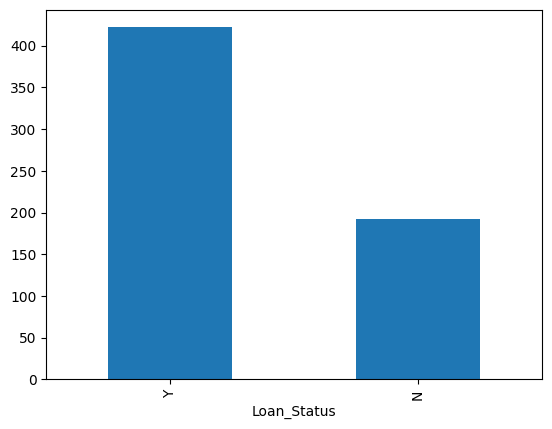

In [42]:
df['Loan_Status'].value_counts().plot(kind='bar')

In [44]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [45]:
df['Loan_Status'].value_counts(dropna=False,normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


In [46]:
df['Loan_Status'].value_counts(dropna=False,normalize=True).map("{:2%}".format)

,proportion
Loan_Status,
Y,68.729642%
N,31.270358%


In [47]:
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
df.select_dtypes(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [49]:
df.select_dtypes(include='object').columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [50]:
df.select_dtypes(include='O').columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [13]:
x=df.select_dtypes(include='O').columns.to_list()
print(x)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [14]:
df['Loan_Amount_Term'].dropna().unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [15]:
df['Credit_History'].dropna().unique()

array([1., 0.])

In [16]:
categorical_cols=df.select_dtypes(include='object').columns.to_list()
print(categorical_cols)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [17]:
categorical_cols.remove("Loan_ID")
categorical_cols=categorical_cols + ['Loan_Amount_Term','Credit_History']
print(categorical_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Loan_Amount_Term', 'Credit_History']


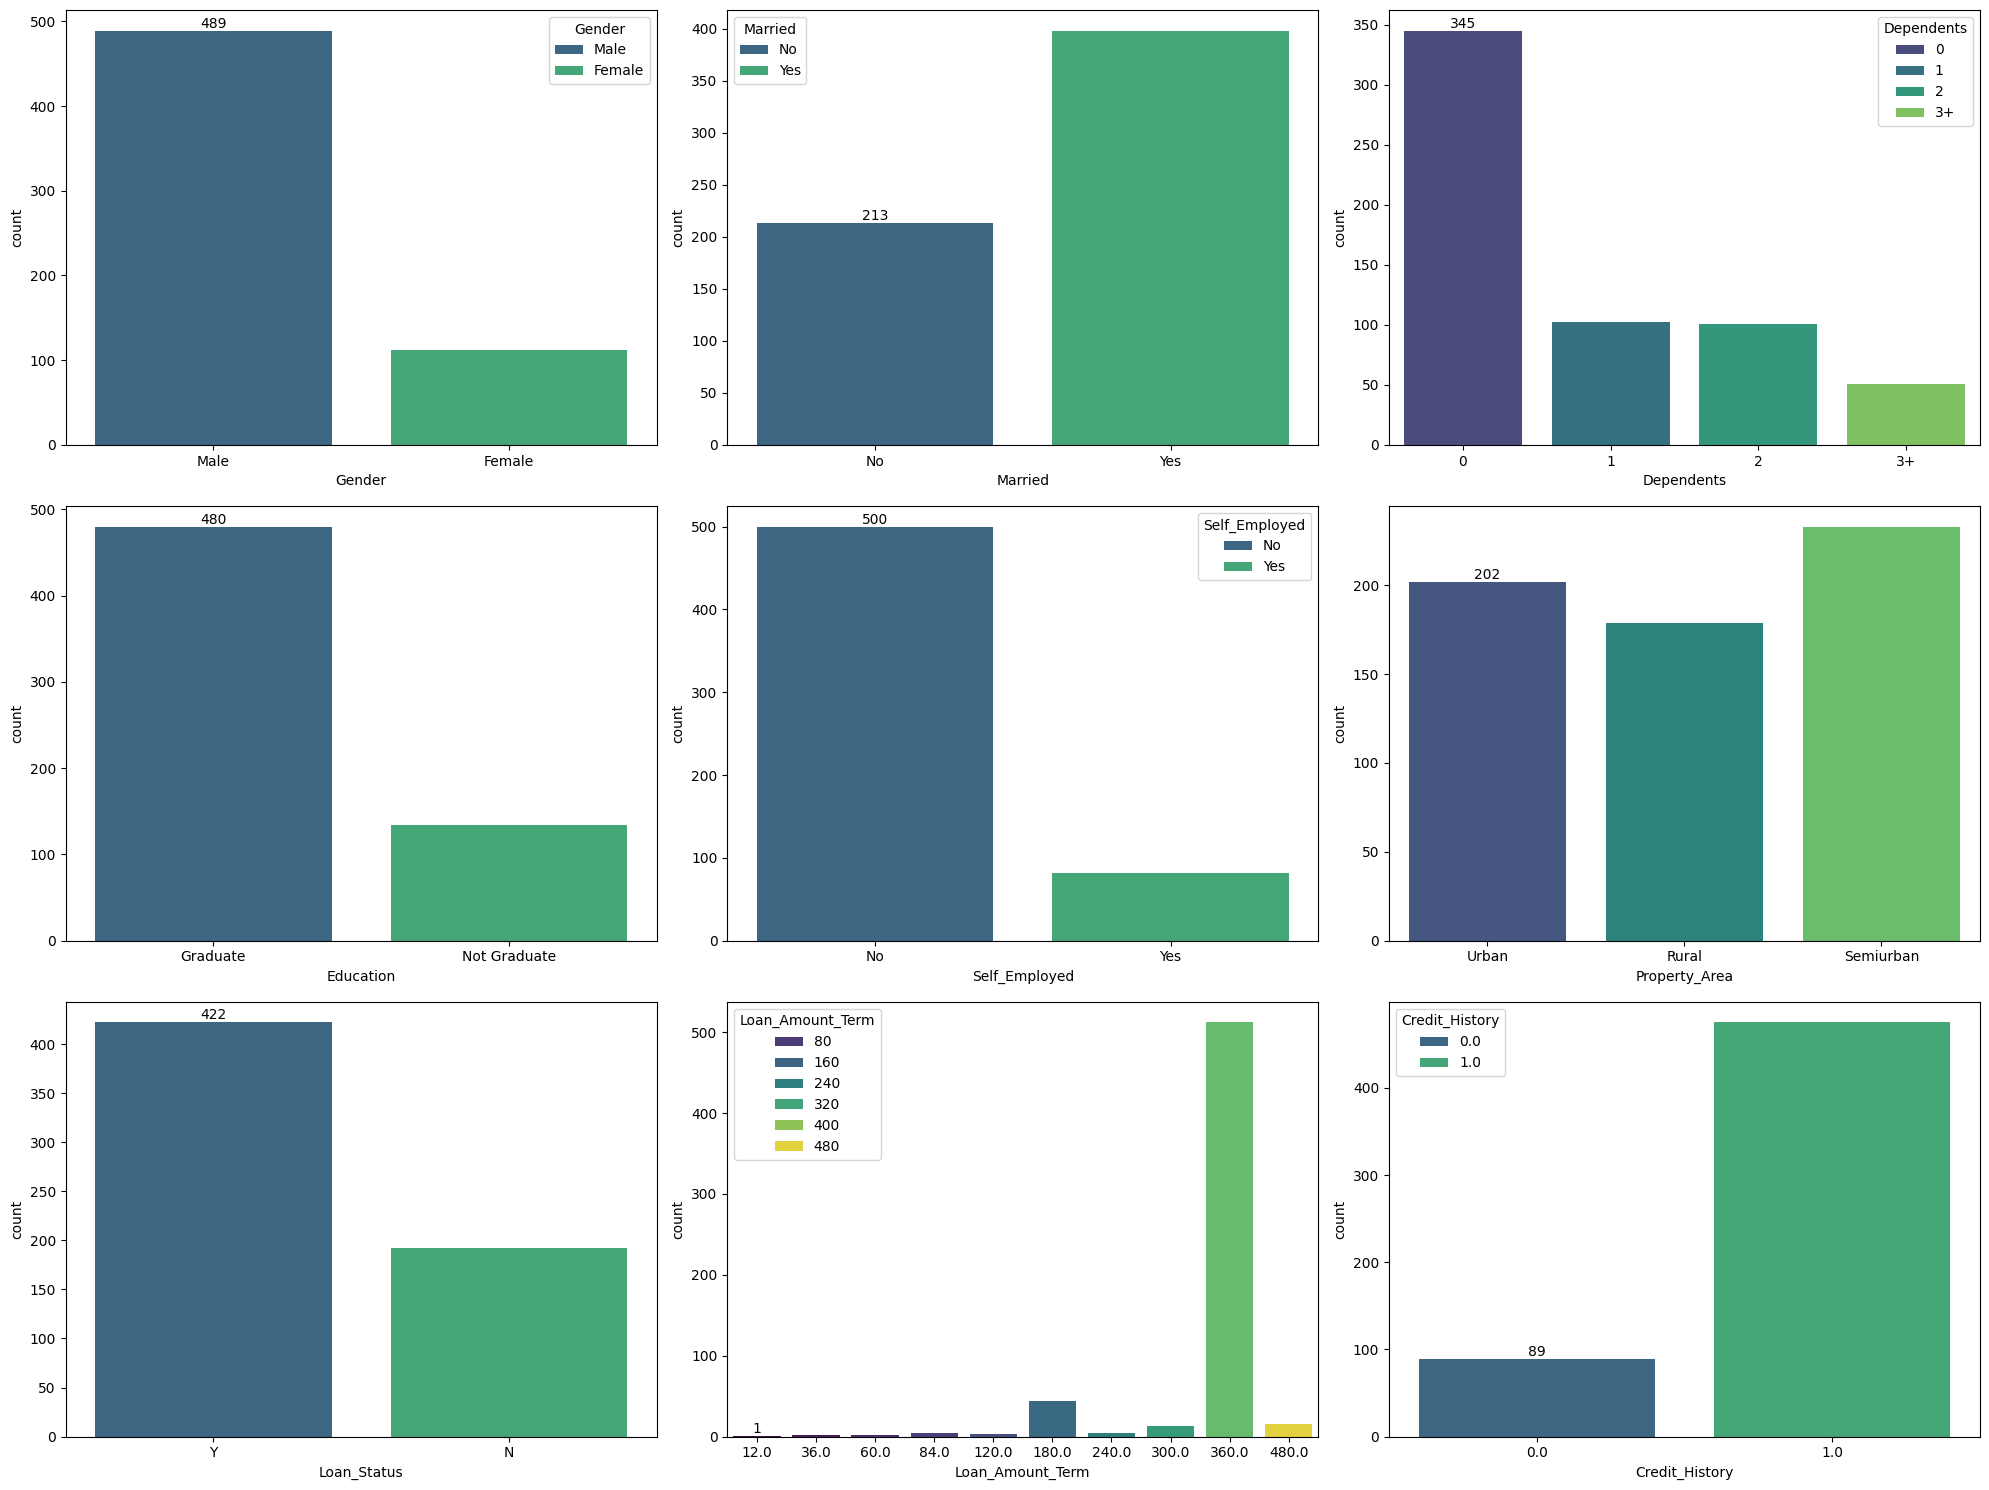

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for col, subplot in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=df[col], ax=subplot, palette='viridis',hue=df[col]).bar_label(subplot.containers[0])
plt.tight_layout()
plt.show()


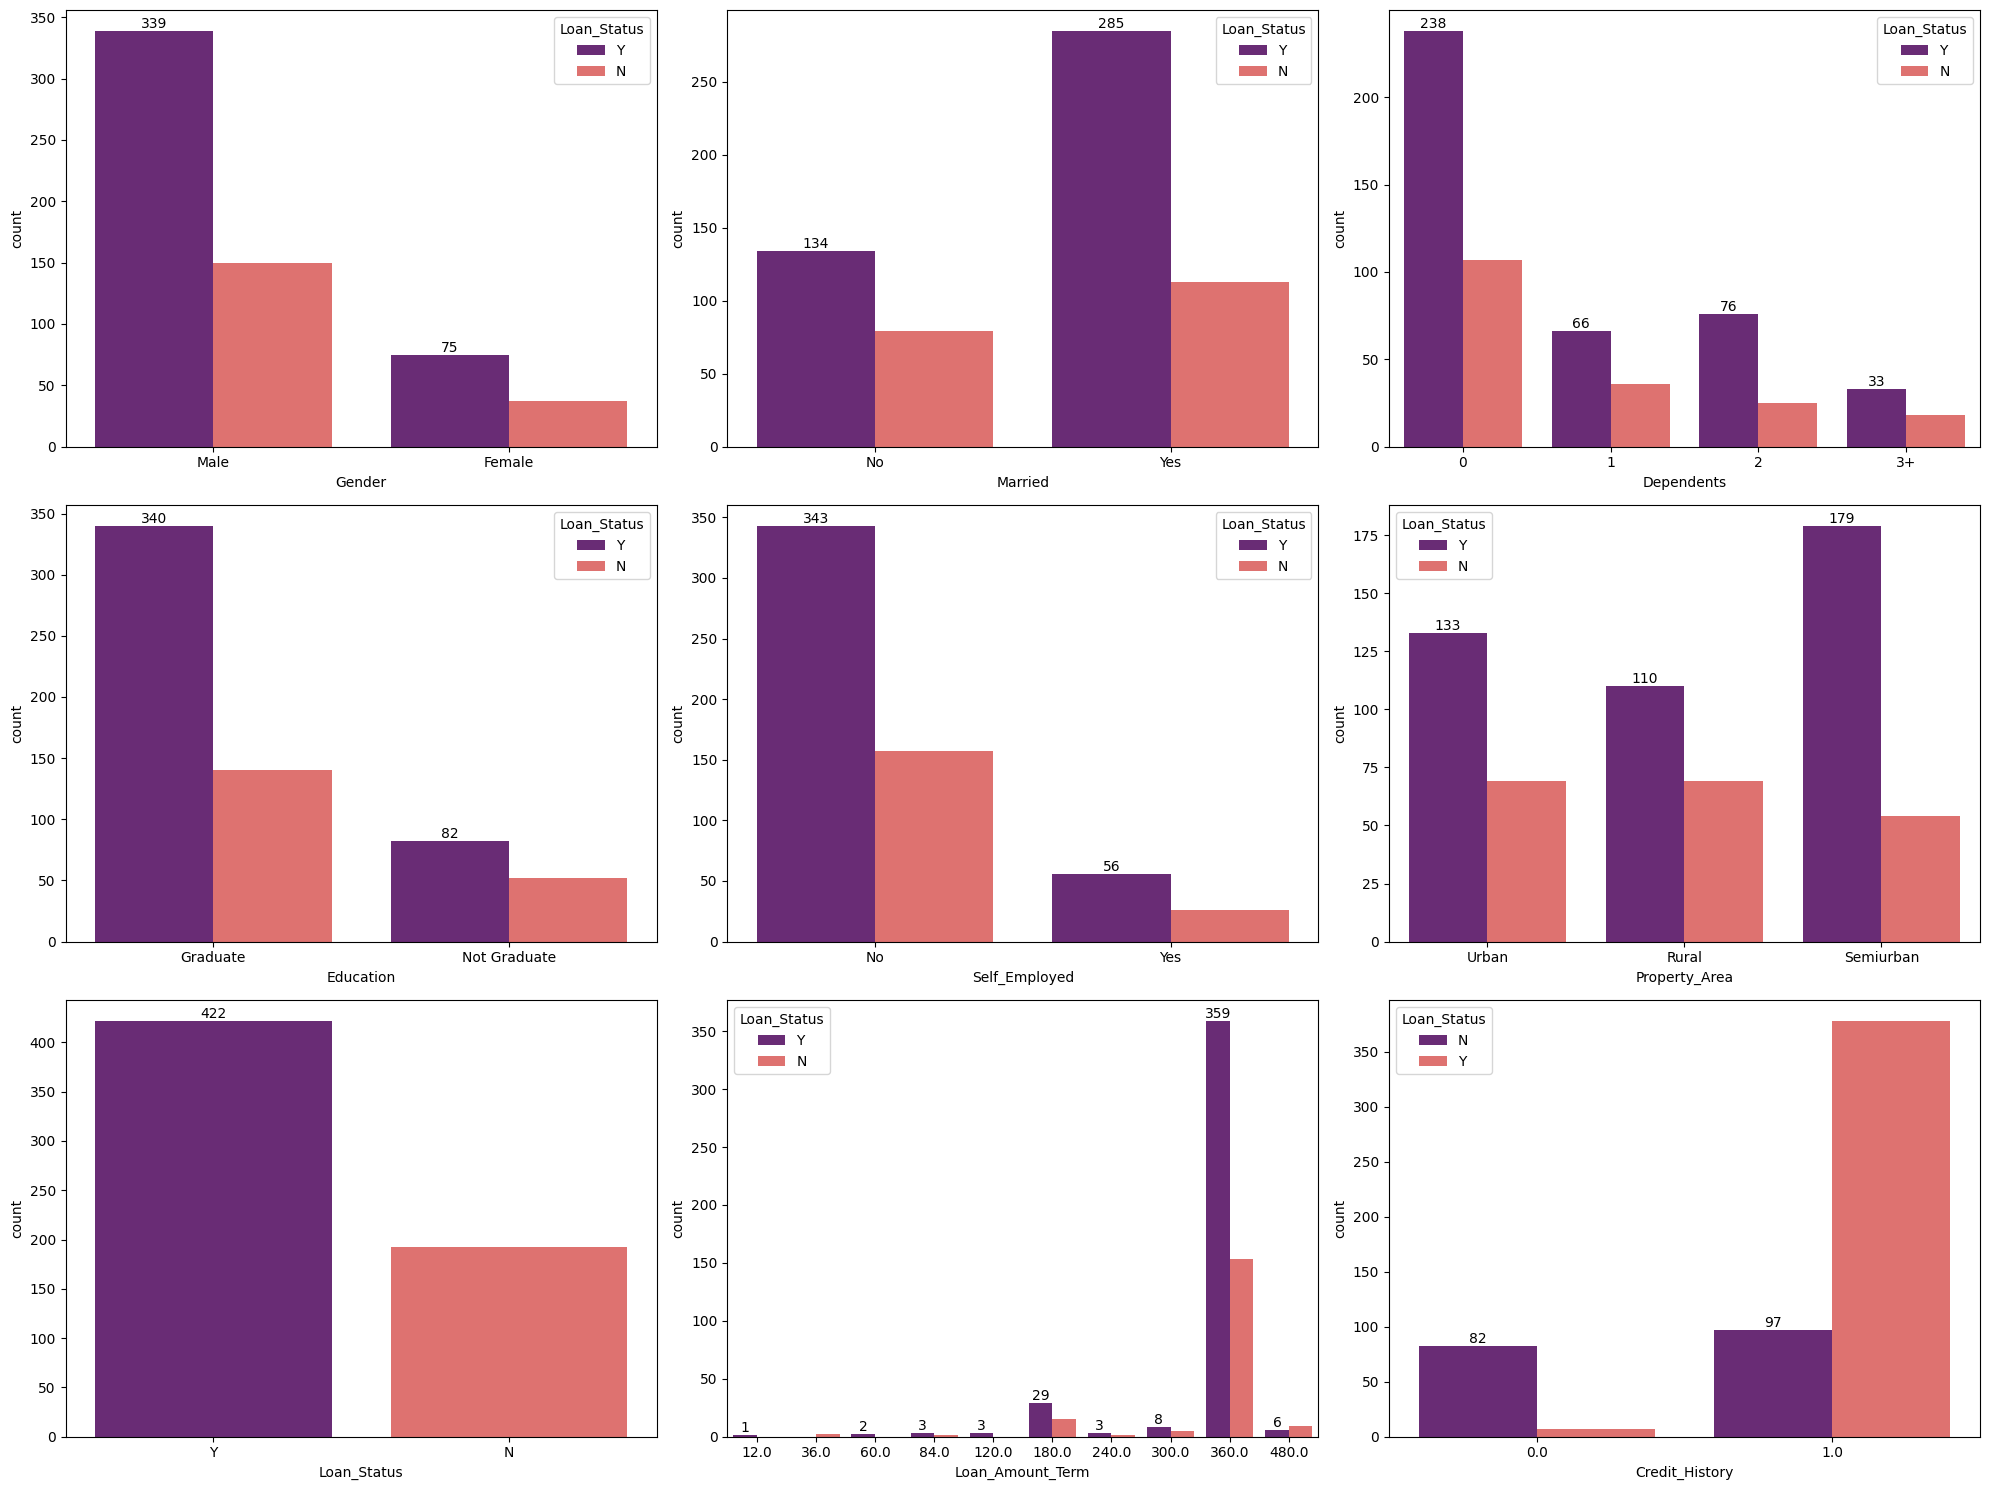

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for col, subplot in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=df[col], ax=subplot, palette='magma',hue=df['Loan_Status']).bar_label(subplot.containers[0])
plt.tight_layout()
plt.show()


numerical variables

In [33]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
numerical_cols=df.select_dtypes(include='number').columns.to_list()
print(numerical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [37]:
df[numerical_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


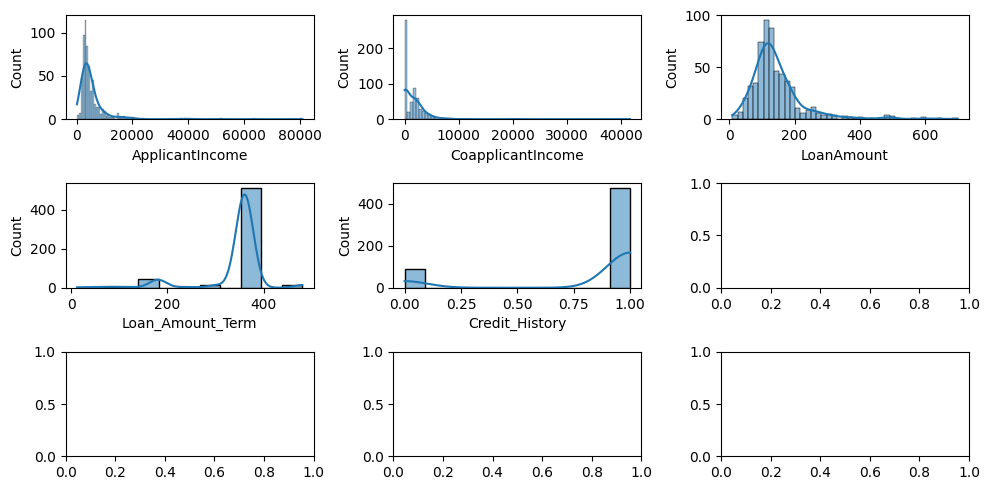

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))
for index,col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes.flatten()[index], kde=True)
plt.tight_layout()
plt.show()

In [40]:
df[numerical_cols].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<Axes: >

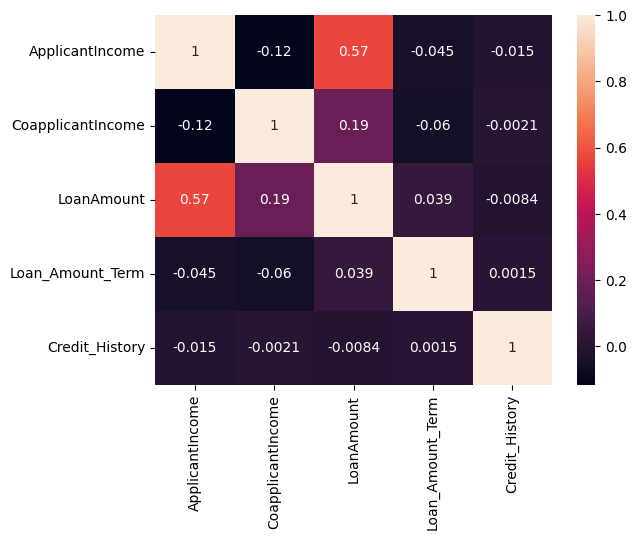

In [41]:
sns.heatmap(df[numerical_cols].corr(),annot=True)

bivariate analysis

<Axes: ylabel='count'>

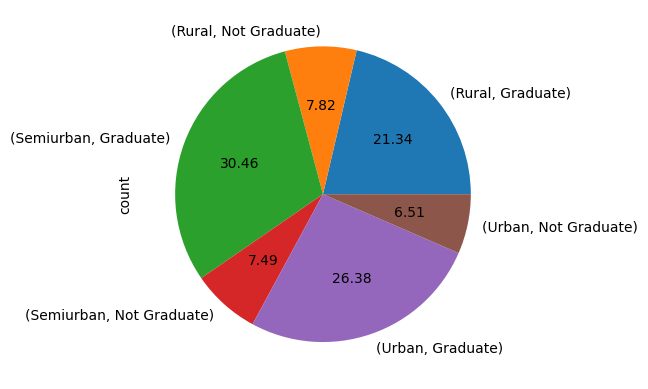

In [42]:
df.groupby('Property_Area').Education.value_counts().plot.pie(autopct='%.2f')

<Axes: xlabel='Self_Employed'>

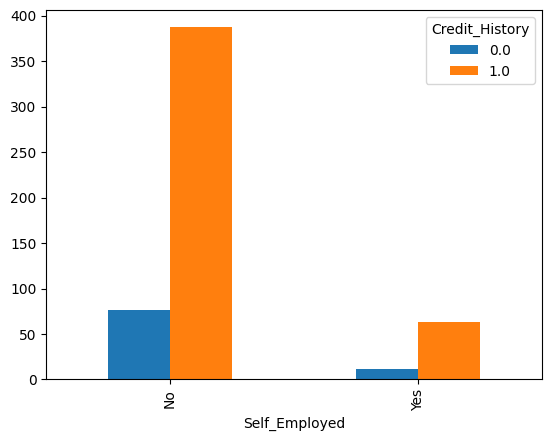

In [43]:
pd.crosstab(df['Self_Employed'],df['Credit_History']).plot.bar()

In [44]:
df.groupby("Education")['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,480.0,5857.433333,6739.797954,150.0,2998.75,4000.0,6068.75,81000.0
Not Graduate,134.0,3777.283582,2237.081586,210.0,2583.00,3357.5,4333.00,18165.0


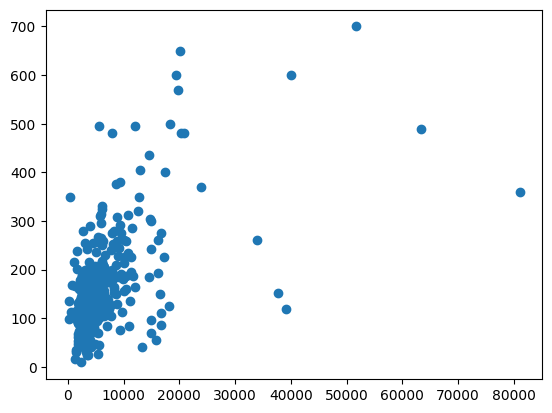

In [46]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])
plt.show()

<Axes: xlabel='Loan_Amount_Term'>

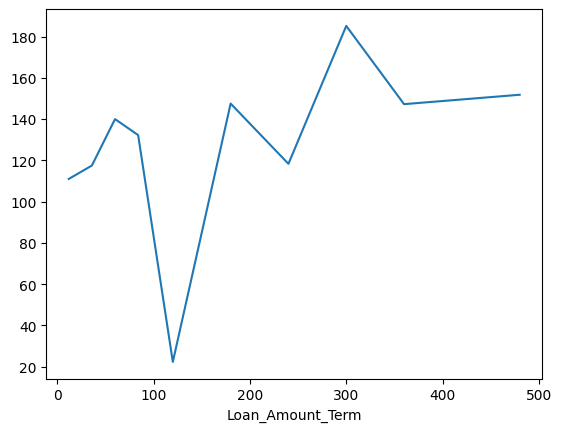

In [48]:
df.groupby('Loan_Amount_Term').LoanAmount.mean().plot()

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

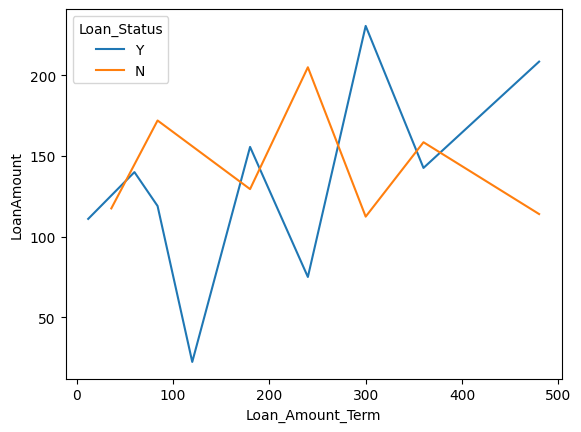

In [49]:
sns.lineplot(x=df['Loan_Amount_Term'],y=df['LoanAmount'],hue=df['Loan_Status'],errorbar=None)

IndexError: index 3 is out of bounds for axis 0 with size 3

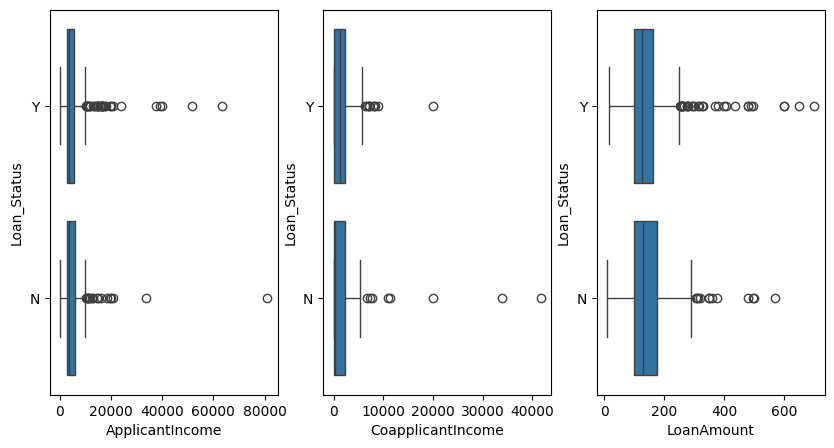

In [54]:
fig,axes=plt.subplots(ncols=3,figsize=(10,5))
for index,col in enumerate(numerical_cols):
    sns.boxplot(y=df['Loan_Status'],x=df[col],ax=axes[index])
plt.tight_layout()
plt.show()

data preprocessing
data cleaning

In [56]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [57]:
null_count=df.isnull().sum()
null_count[null_count>0]

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [60]:
null_cols=null_count[null_count>0].index.to_list()
print(null_cols)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [62]:
null_cols.remove('LoanAmount')

imputation

In [65]:
# Define the function without using `inplace`
def fillna_mode(col_name):
    df[col_name] = df[col_name].fillna(df[col_name].mode()[0])

# Apply the function to columns with null values
for col in null_cols:
    fillna_mode(col)


In [67]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())


In [69]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


check for outliers

<Axes: xlabel='LoanAmount'>

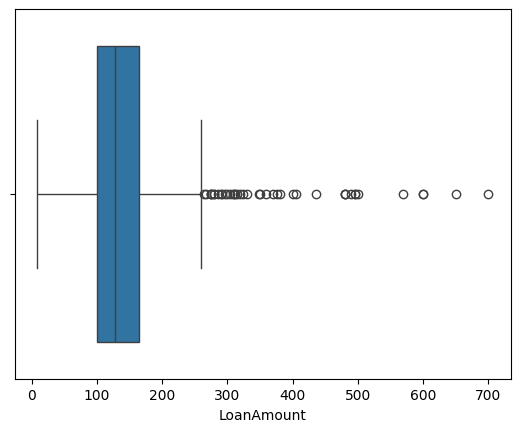

In [70]:
sns.boxplot(x=df['LoanAmount'])

remove outliers

In [71]:
print(numerical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [75]:
n=numerical_cols.copy()

q1= df[n].quantile(0.25)
q3= df[n].quantile(0.75)
iqr=q3-q1

df[n]=df[n][(df[n]>=q1-1.5*iqr) & (df[n]<=q3+1.5*iqr)]

<Axes: xlabel='LoanAmount'>

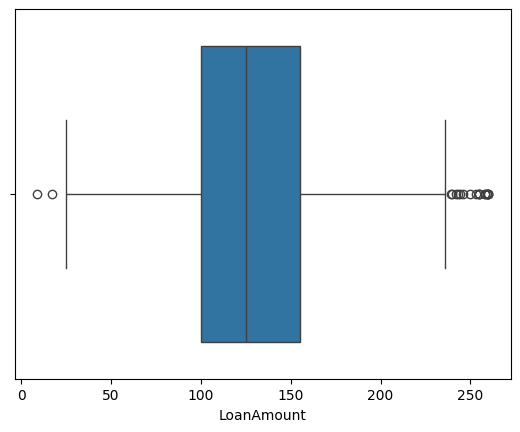

In [76]:
sns.boxplot(x=df['LoanAmount'])

square root transformation to treat skewes data

In [79]:
import numpy as np

In [80]:
def sqrt_transform(col_name):
      df[col_name]=np.sqrt(df[col_name])

for col in numerical_cols:
    sqrt_transform(col)

<Axes: ylabel='Density'>

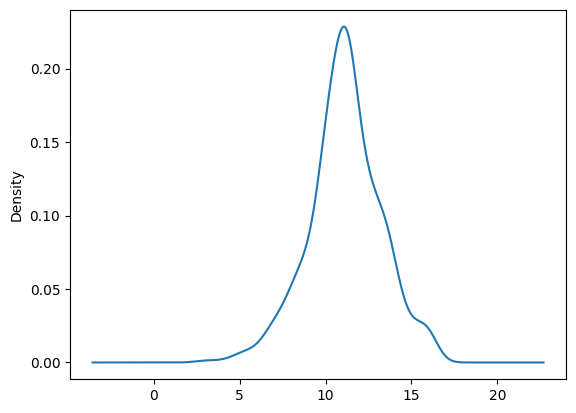

In [82]:
df['LoanAmount'].plot.kde()

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

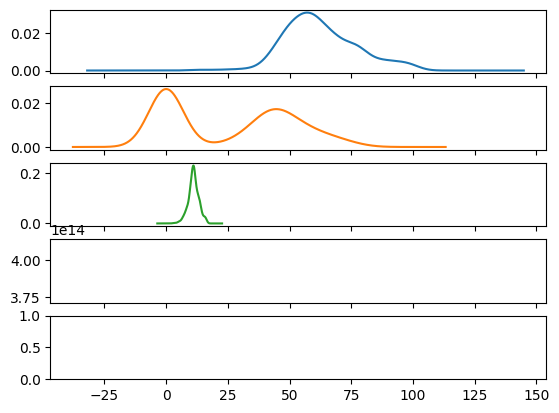

In [89]:
df[numerical_cols].plot(kind='kde',subplots=True )

In [90]:
df[numerical_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,596.000000,573.000000,5.260000e+02,525.0
mean,62.565293,25.637303,11.139134,1.897367e+01,1.0
std,14.514855,25.157895,2.100194,2.595950e-13,0.0
min,12.247449,0.000000,3.000000,1.897367e+01,1.0
25%,52.383109,0.000000,10.000000,1.897367e+01,1.0
50%,60.319876,32.109185,11.180340,1.897367e+01,1.0
75%,70.784769,46.615356,12.449900,1.897367e+01,1.0
max,100.692602,75.504967,16.124515,1.897367e+01,1.0


feature selection

In [119]:
x=df.drop(columns=['Loan_ID','Loan_Status'])
y=df['Loan_Status']

In [120]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,76.478755,0.000000,11.313708,18.973666,1.0,Urban
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,18.973666,1.0,Rural
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,18.973666,1.0,Urban
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,18.973666,1.0,Urban
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,18.973666,1.0,Urban


feature engineering

In [121]:
x_cat_cols= x.select_dtypes(include='object').columns.to_list()
x_cat_cols
#

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [122]:
x_cat_cols=list(x_cat_cols)+["Loan_Amount_Term"]
x_cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Amount_Term']

handle catergorical

In [125]:
import re


In [128]:
X = df.copy()  # Replace `df` with the original DataFrame variable


In [129]:
from sklearn.preprocessing import OrdinalEncoder

# Ensure all columns in x_cat_cols are treated as categorical
X[x_cat_cols] = X[x_cat_cols].astype(str)

encoder = OrdinalEncoder()
X[x_cat_cols] = encoder.fit_transform(X[x_cat_cols])

X.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,76.478755,0.000000,11.313708,0.0,1.0,2.0,Y
1,LP001003,1.0,1.0,1.0,0.0,0.0,67.697858,38.832976,11.313708,0.0,1.0,0.0,N
2,LP001005,1.0,1.0,0.0,0.0,1.0,54.772256,0.000000,8.124038,0.0,1.0,2.0,Y
3,LP001006,1.0,1.0,0.0,1.0,0.0,50.823223,48.559242,10.954451,0.0,1.0,2.0,Y
4,LP001008,1.0,0.0,0.0,0.0,0.0,77.459667,0.000000,11.874342,0.0,1.0,2.0,Y


feature scaling

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])



In [136]:
X.sample(n=5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
558,LP002798,1.0,1.0,0.0,0.0,0.0,-0.015135,1.035338,0.757157,-0.409024,0.0,1.0,Y
283,LP001917,0.0,0.0,0.0,0.0,0.0,-1.379773,0.603870,-1.806489,-0.409024,0.0,2.0,Y
319,LP002050,1.0,1.0,1.0,0.0,1.0,2.581351,-1.019912,0.624662,-0.409024,0.0,0.0,N
121,LP001430,0.0,0.0,0.0,0.0,0.0,0.136482,-1.019912,-2.147335,-0.409024,0.0,1.0,Y
19,LP001041,1.0,1.0,0.0,0.0,0.0,-0.798174,1.333643,-0.197930,-0.409024,0.0,2.0,Y
